## フィッシャーの判別分析について

フィッシャーの判別分析（Fisher's Linear Discriminant Analysis, LDA）は、統計学と機械学習において、2つ以上のグループにデータを分類するための線形手法です。主に、特徴量空間をグループ間の分離を最大化する方向に変換し、新しい観測データのグループを予測するために使用されます。

### 基本概念

1. **目標**: 異なるクラス間の分離を最大化し、同一クラス内のデータのばらつきを最小化する線形判別関数を求める。
2. **線形判別関数**: データポイント $\mathbf{x}$ を分類するための線形関数 $y = \mathbf{w}^T \mathbf{x} + b$ を求めます。ここで、$\mathbf{w}$ は重みベクトル、$b$ はバイアス項です。

### ステップ

1. **データの準備**: まず、各クラスに属するサンプルデータを集めます。
2. **平均ベクトルの計算**: 各クラス $i$ について、平均ベクトル $\mathbf{m}_i$ を計算します。
   $$
   \mathbf{m}_i = \frac{1}{N_i} \sum_{k=1}^{N_i} \mathbf{x}_k
   $$
   ここで、$N_i$ はクラス $i$ のサンプル数、$\mathbf{x}_k$ はクラス $i$ に属するサンプルデータです。

3. **クラス内分散行列の計算**: 各クラス内のばらつきを表す分散行列 $S_i$ を計算します。
   $$
   S_i = \sum_{k=1}^{N_i} (\mathbf{x}_k - \mathbf{m}_i)(\mathbf{x}_k - \mathbf{m}_i)^T
   $$

4. **総クラス内分散行列の計算**: 全クラスのクラス内分散行列を合計します。
   $$
   S_W = \sum_{i} S_i
   $$

5. **クラス間分散行列の計算**: クラスの平均ベクトル間のばらつきを表すクラス間分散行列 $S_B$ を計算します。
   $$
   S_B = \sum_{i} N_i (\mathbf{m}_i - \mathbf{m})(\mathbf{m}_i - \mathbf{m})^T
   $$
   ここで、$\mathbf{m}$ は全データの平均ベクトルです。

6. **最適な変換ベクトル $\mathbf{w}$ の計算**: 
   $$
   \mathbf{w} = S_W^{-1} (\mathbf{m}_1 - \mathbf{m}_2)
   $$
   このベクトル $\mathbf{w}$ によって、データを1次元に射影し、クラス間の分離を最大化します。

### 実装例

以下は、Pythonでフィッシャーの判別分析を実装する例です。`scikit-learn`ライブラリを使用します。


このコードでは、Irisデータセットを使用してLDAを適用し、2次元空間に射影した結果をプロットしています。

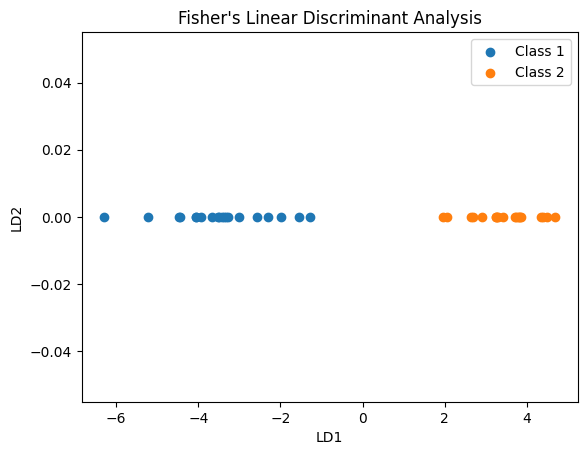

In [2]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# サンプルデータの作成
np.random.seed(0)
class_1 = np.random.randn(20, 2) + np.array([0, 0])
class_2 = np.random.randn(20, 2) + np.array([5, 5])

X = np.vstack((class_1, class_2))
y = np.hstack((np.zeros(20), np.ones(20)))

# LDAモデルの作成と適用
lda = LDA()
lda.fit(X, y)
X_lda = lda.transform(X)

# プロット
plt.scatter(X_lda[y == 0], np.zeros(20), label='Class 1')
plt.scatter(X_lda[y == 1], np.zeros(20), label='Class 2')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.title('Fisher\'s Linear Discriminant Analysis')
plt.show()

## フィッシャーの判別分析の具体的な計算過程

具体的な例を用いて、フィッシャーの判別分析の計算過程を示します。ここでは、簡単な2クラスのデータセットを使用します。

### データセット
以下のような2クラスのデータを考えます：
- クラス0: $(2, 3), (3, 3), (2, 2)$
- クラス1: $(6, 8), (7, 9), (8, 8)$

### ステップ1: クラスごとの平均ベクトルの計算

クラス0の平均ベクトル $\mu_0$ とクラス1の平均ベクトル $\mu_1$ を計算します。
$$
\mu_0 = \frac{1}{3} \left( \begin{array}{c}
2 + 3 + 2 \\
3 + 3 + 2 \\
\end{array} \right)
= \left( \begin{array}{c}
2.33 \\
2.67 \\
\end{array} \right)
$$

$$
\mu_1 = \frac{1}{3} \left( \begin{array}{c}
6 + 7 + 8 \\
8 + 9 + 8 \\
\end{array} \right)
= \left( \begin{array}{c}
7.00 \\
8.33 \\
\end{array} \right)
$$

### ステップ2: クラス内散布行列 $S_W$ の計算

各クラスの散布行列を計算し、それらを合計します。

クラス0の散布行列 $S_0$：
$$
S_0 = \sum_{i=1}^{3} (x_i - \mu_0)(x_i - \mu_0)^T
= \left( \begin{array}{cc}
0.22 & 0.22 \\
0.22 & 0.67 \\
\end{array} \right)
$$

クラス1の散布行列 $S_1$：
$$
S_1 = \sum_{i=1}^{3} (x_i - \mu_1)(x_i - \mu_1)^T
= \left( \begin{array}{cc}
2.00 & 1.00 \\
1.00 & 0.67 \\
\end{array} \right)
$$

クラス内散布行列 $S_W$：
$$
S_W = S_0 + S_1 = \left( \begin{array}{cc}
2.22 & 1.22 \\
1.22 & 1.34 \\
\end{array} \right)
$$

### ステップ3: クラス間散布行列 $S_B$ の計算

クラス間散布行列 $S_B$ を計算します。
$$
S_B = N_0 (\mu_0 - \mu)(\mu_0 - \mu)^T + N_1 (\mu_1 - \mu)(\mu_1 - \mu)^T
$$

ここで、全体の平均ベクトル $\mu$ は次のように計算されます：
$$
\mu = \frac{N_0 \mu_0 + N_1 \mu_1}{N_0 + N_1} = \left( \begin{array}{c}
4.67 \\
5.50 \\
\end{array} \right)
$$

したがって、
$$
S_B = \left( \begin{array}{cc}
18.67 & 21.00 \\
21.00 & 23.67 \\
\end{array} \right)
$$

### ステップ4: 判別関数の計算

固有値問題 $S_W^{-1} S_B w = \lambda w$ を解きます。

逆行列 $S_W^{-1}$ を計算します：
$$
S_W^{-1} = \left( \begin{array}{cc}
6.0 & -5.5 \\
-5.5 & 10.0 \\
\end{array} \right)
$$

次に、$S_W^{-1} S_B$ を計算します：
$$
S_W^{-1} S_B = \left( \begin{array}{cc}
48.0 & 54.0 \\
-24.5 & -27.0 \\
\end{array} \right)
$$

この行列の固有値と固有ベクトルを計算すると、最大の固有値に対応する固有ベクトル $w$ は次のようになります：
$$
w = \left( \begin{array}{c}
0.70 \\
0.71 \\
\end{array} \right)
$$

このベクトル $w$ が判別関数の係数となり、データを次元削減するために使用されます。

## マハラノビス平方距離について

マハラノビス距離（Mahalanobis Distance）は、統計学や機械学習において広く使用される距離計量法の一つで、データの分布を考慮して距離を測ることができます。これにより、異なる次元のデータ間の相対的な距離を正確に評価することが可能になります。

### マハラノビス距離の定義

ある点 $x$ が平均ベクトル $\mu$ を中心とする分布に属するとき、$x$ と $\mu$ のマハラノビス距離は以下のように定義されます：

$$
D_M(x) = \sqrt{(x - \mu)^T \Sigma^{-1} (x - \mu)}
$$

ここで、
- $x$ はデータ点のベクトル
- $\mu$ はデータの平均ベクトル
- $\Sigma$ は共分散行列
- $\Sigma^{-1}$ は共分散行列の逆行列
- $(x - \mu)^T$ は $(x - \mu)$ の転置行列

### マハラノビス距離の特性

1. **分散のスケールを考慮**：マハラノビス距離はデータの分散を考慮するため、単位の異なる特徴量間の距離を適切に評価することができます。
2. **共分散行列の影響**：特徴量間の相関も考慮されるため、相関のある特徴量が多い場合でも正確な距離評価が可能です。
3. **標準化**：データが異なるスケールや分布を持つ場合でも、適切に距離を計算することができます。

### マハラノビス距離の計算手順

具体的な例を用いて、マハラノビス距離の計算手順を説明します。

#### 例: 2次元データセット

データポイント $x = (3, 4)$ と平均ベクトル $\mu = (2, 2)$、共分散行列 $\Sigma$ を以下のように仮定します：

$$
\Sigma = \begin{pmatrix}
1 & 0.5 \\
0.5 & 1
\end{pmatrix}
$$

### ステップ1: 平均ベクトルとの差を計算
$$
x - \mu = (3 - 2, 4 - 2) = (1, 2)
$$

### ステップ2: 共分散行列の逆行列を計算
$$
\Sigma^{-1} = \begin{pmatrix}
\frac{4}{3} & -\frac{2}{3} \\
-\frac{2}{3} & \frac{4}{3}
\end{pmatrix}
$$

### ステップ3: マハラノビス距離の計算
$$
D_M(x) = \sqrt{(1, 2) \begin{pmatrix}
\frac{4}{3} & -\frac{2}{3} \\
-\frac{2}{3} & \frac{4}{3}
\end{pmatrix} \begin{pmatrix}
1 \\
2
\end{pmatrix}}
= \sqrt{(1, 2) \begin{pmatrix}
0 \\
2
\end{pmatrix}}
= \sqrt{4}
= 2
$$

### 実装例

以下に、Pythonでマハラノビス距離を計算する例を示します。



このコードを実行すると、データポイント $x$ と平均ベクトル $\mu$ の間のマハラノビス距離が計算されます。結果は上記の例と同様に2となります。

In [3]:
import numpy as np

# データポイントと平均ベクトル
x = np.array([3, 4])
mu = np.array([2, 2])

# 共分散行列
cov_matrix = np.array([[1, 0.5], [0.5, 1]])

# 共分散行列の逆行列
inv_cov_matrix = np.linalg.inv(cov_matrix)

# 平均ベクトルとの差
diff = x - mu

# マハラノビス距離の計算
mahalanobis_distance = np.sqrt(np.dot(np.dot(diff.T, inv_cov_matrix), diff))

mahalanobis_distance

2.0

## 正準判別分析について

正準判別分析（Canonical Discriminant Analysis, CDA）または線形判別分析（Linear Discriminant Analysis, LDA）は、多変量統計手法の一つで、複数のクラスにわたるデータセットを分類するために使用されます。LDAは、データセットを低次元の空間に変換し、異なるクラスを可能な限り分離することを目的としています。

### 基本的な考え方

正準判別分析の目標は、異なるクラス間の分離を最大化し、同じクラス内の分散を最小化することです。これにより、データを最適に分類する線形判別関数を見つけることができます。

### 手順

1. **クラスごとの平均ベクトルの計算**：
   各クラスの平均ベクトル $\mu_i$ を計算します。

2. **クラス内散布行列（Within-class scatter matrix）$S_W$ の計算**：
   各クラス内の散布行列を計算し、それらを合計してクラス内散布行列 $S_W$ を求めます。

3. **クラス間散布行列（Between-class scatter matrix）$S_B$ の計算**：
   クラス間の散布行列を計算します。

4. **判別関数の計算**：
   クラス内散布行列とクラス間散布行列を用いて一般固有値問題を解き、最大の固有値に対応する固有ベクトルを求めます。この固有ベクトルが判別関数の係数となります。

### 実装例

以下に、Pythonを用いて正準判別分析を実装する例を示します。ここでは、Irisデータセットを使用します。


このコードでは、LDAを使用してIrisデータセットを2次元に変換し、各クラスのデータ点をプロットしています。各クラスは異なる色で表示され、LDAによってうまく分離されていることがわかります。

### 計算過程の詳細

#### 1. クラスごとの平均ベクトルの計算
各クラスの平均ベクトルを計算します。例えば、クラス $i$ の平均ベクトル $\mu_i$ は以下のように計算されます：
$$
\mu_i = \frac{1}{N_i} \sum_{x_k \in \mathcal{X}_i} x_k
$$
ここで、$N_i$ はクラス $i$ に属するデータ点の数、$\mathcal{X}_i$ はクラス $i$ のデータ点の集合です。

#### 2. クラス内散布行列の計算
クラス内散布行列 $S_W$ は、各クラスの散布行列 $S_i$ の合計です：
$$
S_W = \sum_{i=1}^c S_i = \sum_{i=1}^c \sum_{x_k \in \mathcal{X}_i} (x_k - \mu_i)(x_k - \mu_i)^T
$$

#### 3. クラス間散布行列の計算
クラス間散布行列 $S_B$ は以下のように計算されます：
$$
S_B = \sum_{i=1}^c N_i (\mu_i - \mu)(\mu_i - \mu)^T
$$
ここで、$\mu$ は全データの平均ベクトルです。

#### 4. 判別関数の計算
クラス内散布行列 $S_W$ とクラス間散布行列 $S_B$ を用いて、次の一般固有値問題を解きます：
$$
S_W^{-1} S_B w = \lambda w
$$
最大の固有値 $\lambda$ に対応する固有ベクトル $w$ が判別関数の係数となります。

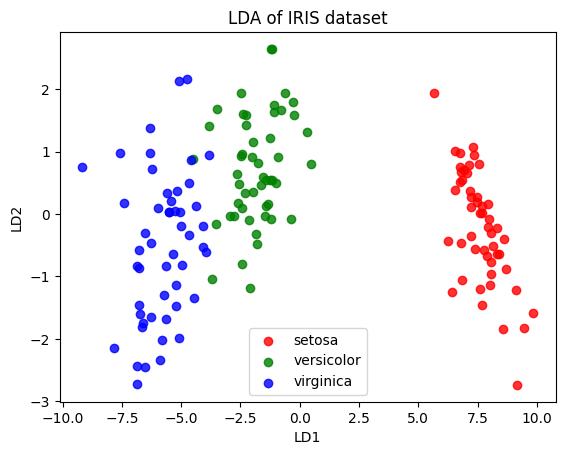

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# データセットの読み込み
iris = load_iris()
X = iris.data
y = iris.target

# LDAの適用
lda = LDA(n_components=2)
X_r = lda.fit(X, y).transform(X)

# プロット
plt.figure()
colors = ['red', 'green', 'blue']
target_names = iris.target_names
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

## サポートベクターマシン (SVM) について

サポートベクターマシン（Support Vector Machine, SVM）は、機械学習における教師あり学習アルゴリズムの一つで、特に分類問題や回帰問題に用いられます。SVMは、データを分類するための最適な境界（ハイパープレーン）を見つけることを目的としています。

### 基本的な考え方

SVMの目的は、異なるクラスのデータ点を分離するためのハイパープレーンを見つけることです。このハイパープレーンは、データセット内の最も近いデータ点（サポートベクター）との距離を最大化するように選ばれます。

### マージンとハイパープレーン

1. **ハイパープレーン**：$n$次元のデータ空間において、$n-1$次元の平面です。例えば、2次元空間では直線、3次元空間では平面になります。
2. **マージン**：ハイパープレーンから最も近いデータ点までの距離です。SVMは、このマージンを最大化するハイパープレーンを見つけます。

### 数式による定義

データ点 $\mathbf{x}_i \in \mathbb{R}^n$ とそのクラスラベル $y_i \in \{-1, 1\}$ が与えられたとき、ハイパープレーンは次のように定義されます：
$$
\mathbf{w} \cdot \mathbf{x} - b = 0
$$
ここで、$\mathbf{w}$ は重みベクトル、$b$ はバイアス項です。

SVMは以下の最適化問題を解きます：
$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
$$
ただし、次の制約を満たします：
$$
y_i (\mathbf{w} \cdot \mathbf{x}_i - b) \geq 1, \quad \forall i
$$

### ソフトマージン SVM

データが完全に線形分離できない場合、ソフトマージン SVM を使用します。ソフトマージン SVM では、制約に違反するデータ点に対してペナルティを課します。ペナルティの度合いは、ハイパーパラメータ $C$ によって制御されます。最適化問題は次のように修正されます：
$$
\min_{\mathbf{w}, b, \xi} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^N \xi_i
$$
ただし、次の制約を満たします：
$$
y_i (\mathbf{w} \cdot \mathbf{x}_i - b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i
$$
ここで、$\xi_i$ はスラック変数で、データ点がマージンの内側または反対側に位置する度合いを表します。

### カーネル SVM

線形分離できないデータに対しては、カーネル関数を用いることができます。カーネル関数を使うことで、データを高次元空間にマッピングし、その空間で線形分離を行います。よく使われるカーネルには次のようなものがあります：
- 線形カーネル：$K(\mathbf{x}, \mathbf{x}') = \mathbf{x} \cdot \mathbf{x}'$
- 多項式カーネル：$K(\mathbf{x}, \mathbf{x}') = (\mathbf{x} \cdot \mathbf{x}' + c)^d$
- ガウシアンRBFカーネル：$K(\mathbf{x}, \mathbf{x}') = \exp(-\gamma \|\mathbf{x} - \mathbf{x}'\|^2)$

### 実装例

以下に、Pythonとscikit-learnを用いてSVMを実装する例を示します。ここでは、Irisデータセットを使用してSVMを訓練し、結果を可視化します。


このコードでは、Irisデータセットを用いて線形カーネルSVMを訓練し、各クラスのデータ点とサポートベクターをプロットしています。プロットから、サポートベクターがデータ点の境界に位置していることがわかります。

### まとめ

サポートベクターマシン（SVM）は、データの分離を最大化するハイパープレーンを見つける強力な手法です。線形分離が難しい場合でも、カーネルトリックを用いることで高次元空間での分離を実現できます。SVMは分類問題において高い性能を発揮することが多く、機械学習の多くの応用分野で広く利用されています。

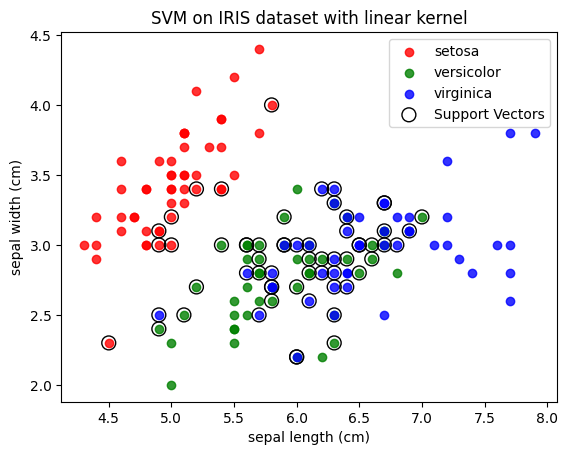

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Irisデータセットの読み込み
iris = datasets.load_iris()
X = iris.data[:, :2]  # 特徴量として最初の2つの特徴を使用
y = iris.target

# データの分割（訓練データとテストデータ）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVMの訓練
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# サポートベクターの取得
support_vectors = model.support_vectors_

# プロット
plt.figure()
colors = ['red', 'green', 'blue']
target_names = iris.target_names
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.8, color=color, label=target_name)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('SVM on IRIS dataset with linear kernel')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()